<a href="https://colab.research.google.com/github/ZuckermanLab/CodingClass2025/blob/main/Day3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Day 3: Correlation and Linear Regression
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
!pip install cptac
import cptac
import cptac.utils as ut

**What is correlation?**

Correlation shows how two things are related. In this case:
- Do students who study more get better scores?
- If the dots go up from left to right, the correlation is positive.
- If the dots go down from left to right, the correlation is negative.
- If the dots are random with no clear pattern, there's no correlation.

Try changing y = y2 or y = y3 in the code to see the difference!

In [2]:
# Sample data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])  # Hours studied

# Three different relationships
# Positive correlation: more studying = higher score
y1 = [19, 30, 36, 30, 36, 45, 48, 55]

# Negative correlation: more studying = lower score
y2 = [15, 12, 10, 7, 5, 4, 2, 1]

# No correlation: scores are random
y3 = [7, 3, 8, 1, 6, 9, 2, 5]

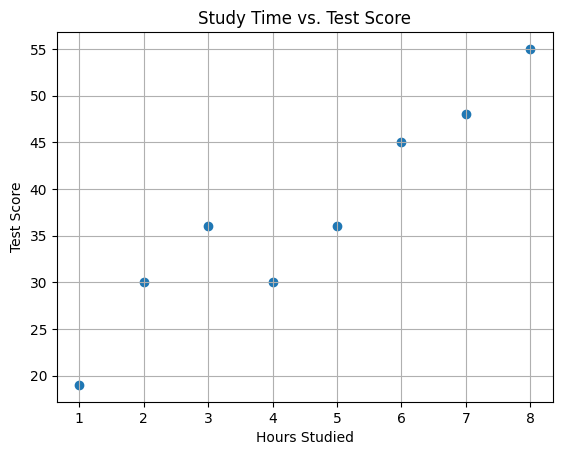

Pearson correlation (r): 0.95


In [3]:
# Choose one of the y-values to plot
y = y1  # Try y2 or y3 for different results

# Create the scatter plot
plt.scatter(x, y)
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Study Time vs. Test Score")
plt.grid(True)
plt.show()

#Calculate and print the Pearson correlation coefficient
r_value, _ = pearsonr(x, y)
print(f"Pearson correlation (r): {r_value:.2f}")

**What is Pearson's r?**

Pearson's r is a number between -1 and 1 that tells us how strong the linear relationship is:
- r close to 1: strong positive correlation (as x increases, y increases)
- r close to -1: strong negative correlation (as x increases, y decreases)
- r close to 0: no clear linear relationship

Pearson's r can be calculated in as follows [only show numerator, illustrate covariance?]:

$$
r = \frac{\text{cov}(x, y)}{\sigma_x \cdot \sigma_y}
$$

where:
- $\text{cov}(x, y)=\sum (x_i - \bar{x})(y_i - \bar{y})/N$ is the covariance between x and y
- $\sigma_x=\sqrt{\sum (x_i - \bar{x})^2/N}$ is the standard deviation of x
- $\sigma_y=\sqrt{\sum (y_i - \bar{y})^2/N}$ is the standard deviation of y
- $N$ is the number of data points
- $\bar{x}$ and $\bar{y}$ are the mean values of $x$ and $y$, respectively

The code above prints the Pearson r value so you can see how strong the connection is!


**What is linear regression?**

Linear regression finds the best-fitting straight line through a set of points.
It helps us make predictions: If we know how many hours someone studied, we can estimate their test score.

The equation of the line is:

$$ y = mx + b $$

where:
- $y$ is the predicted value (e.g. test score)
- $x$ is the input (e.g. hours studied)
- $m$ is the slope (how much y increases when x increases by 1)
- $b$ is the intercept (the value of y when x = 0)

We use this line to make predictions and understand trends!

**How is a "good fit" defined?**

A good fit means the line is close to the actual data points. One way to measure this is by using the sum of squared errors.

$$
\text{squared errors} = \sum (y_i - \hat{y}_i)^2
$$

where:
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value from the line

A smaller squared error means the predictions are close to the real values, so the line fits the data well.

We'll use `scikit-learn` to fit the line and plot it below.

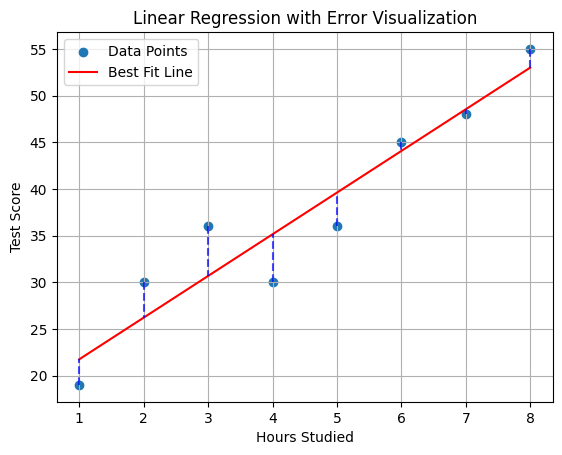

In [4]:
#@title Linear Regression with Error Visualization
y=y1

# Fit a linear regression line
slope, intercept = np.polyfit(x, y, 1)

# Make predicted y values based on the line
y_pred = slope * x + intercept

# Plot data points and regression line
plt.scatter(x, y, label="Data Points")
plt.plot(x, y_pred, color='red', label="Best Fit Line")

# Draw vertical residual lines and squares
for xi, yi, ypi in zip(x, y, y_pred):
    residual = yi - ypi
    # Draw vertical line for residual
    plt.plot([xi, xi], [yi, ypi], color='blue', linestyle='--', alpha=0.7)

plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Linear Regression with Error Visualization")
plt.legend()
plt.grid(True)
plt.show()

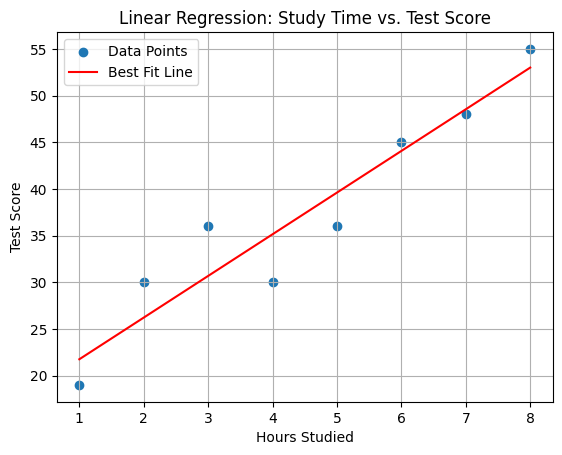

Slope: 4.46
Intercept: 17.29
Squared Error: 94.82


In [5]:
y=y1

# Reshape x to 2D array for scikit-learn
X = x.reshape(-1, 1)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Make predicted y values based on the line
y_pred = slope * x + intercept

# Plot the scatter and the regression line
plt.scatter(x, y, label="Data Points")
plt.plot(x, y_pred, color='red', label="Best Fit Line")
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Linear Regression: Study Time vs. Test Score")
plt.legend()
plt.grid(True)
plt.show()

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

squared_error = np.sum((y - y_pred) ** 2)
print(f"Squared Error: {squared_error:.2f}")

In [6]:
# Predict score for 10 hours of study based on linear regression
x_new = 10
y_new = slope * x_new + intercept
print(f"Predicted score for 10 hours: {y_new:.1f}")

Predicted score for 10 hours: 61.9


**What about more than one input?**

Sometimes, one input isn’t enough. For example, test scores might depend on both how much someone **studied** *and* how much they **slept**.

In this case, we can still use linear regression — we just add more input variables.

The equation becomes:

$$
y = a \cdot x_1 + b \cdot x_2 + c
$$

where:
- $x_1$ is the first input (e.g. hours studied)
- $x_2$ is the second input (e.g. hours slept)
- $a$ and $b$ are the slopes for each input
- $c$ is the intercept

This is called **multiple linear regression**. The model finds the best-fitting plane (instead of a line) in 3D space.

We can still measure how well the model fits using the **sum of squared errors** — just like before, but now predictions depend on multiple inputs.

We’ll fit this using `scikit-learn` and print the equation and error below.


In [7]:
# Define input features
x1 = x  # study hours
x2 = np.array([4, 5, 7, 5, 5, 7, 9, 8])  # sleep hours

y = y1 # test scores

# Stack input features
X = np.column_stack((x1, x2))

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
a, b = model.coef_
c = model.intercept_

print(f"Slope for x1 (study hours): {a:.2f}")
print(f"Slope for x2 (sleep hours): {b:.2f}")
print(f"Intercept: {c:.2f}")

Slope for x1 (study hours): 3.06
Slope for x2 (sleep hours): 2.45
Intercept: 8.26


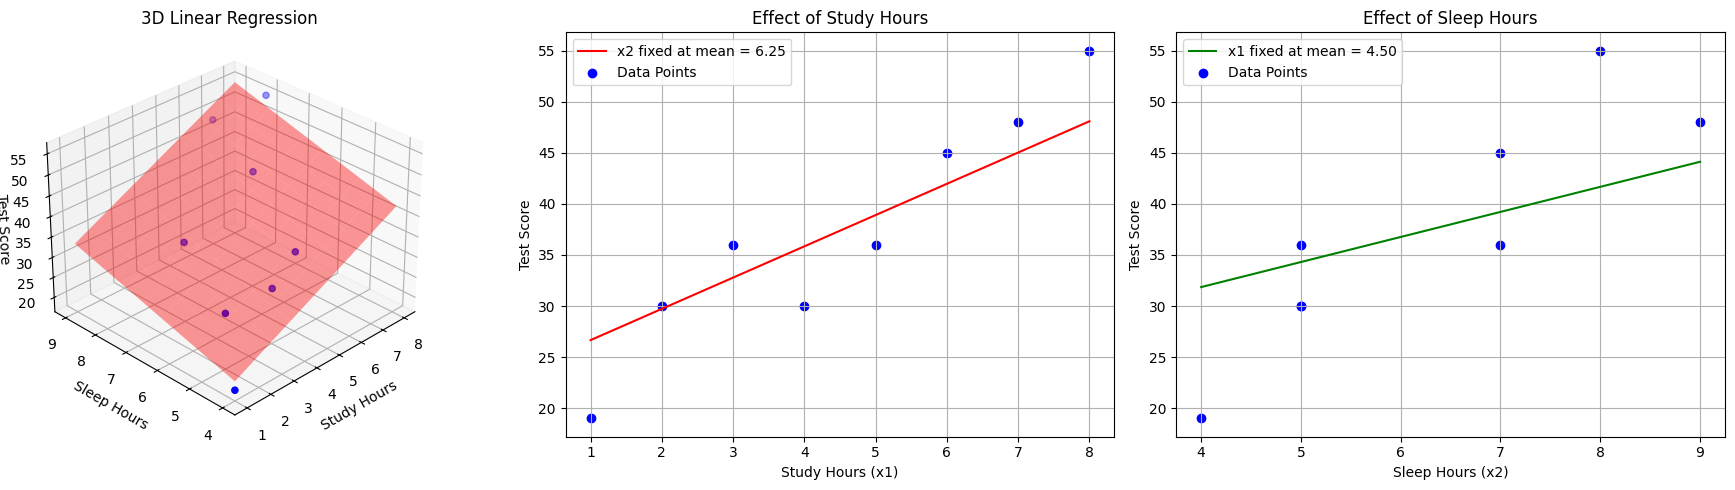

In [8]:
# Meshgrid for plane
x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 10),
                               np.linspace(min(x2), max(x2), 10))
y_grid = a * x1_grid + b * x2_grid + c

# Create single row with 3 subplots
fig = plt.figure(figsize=(18, 5))
gs = fig.add_gridspec(1, 3)

# ---- Subplot 1: 3D Regression ----
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax1.scatter(x1, x2, y, color='blue', label='Data Points')
ax1.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.4, color='red')
ax1.set_xlabel("Study Hours")
ax1.set_ylabel("Sleep Hours")
ax1.set_zlabel("Test Score", labelpad=-1)
ax1.set_title("3D Linear Regression")
ax1.view_init(elev=30, azim=225)

# ---- Subplot 2: x1 vs y ----
x1_range = np.linspace(min(x1), max(x1), 100)
x2_mean = np.mean(x2)
y_x1 = a * x1_range + b * x2_mean + c
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(x1_range, y_x1, color='red', label=f'x2 fixed at mean = {x2_mean:.2f}')
ax2.scatter(x1, y, color='blue', label='Data Points')
ax2.set_xlabel("Study Hours (x1)")
ax2.set_ylabel("Test Score")
ax2.set_title("Effect of Study Hours")
ax2.grid(True)
ax2.legend()

# ---- Subplot 3: x2 vs y ----
x2_range = np.linspace(min(x2), max(x2), 100)
x1_mean = np.mean(x1)
y_x2 = a * x1_mean + b * x2_range + c
ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(x2_range, y_x2, color='green', label=f'x1 fixed at mean = {x1_mean:.2f}')
ax3.scatter(x2, y, color='blue', label='Data Points')
ax3.set_xlabel("Sleep Hours (x2)")
ax3.set_ylabel("Test Score")
ax3.set_title("Effect of Sleep Hours")
ax3.grid(True)
ax3.legend()

#ToDo: For Subplots 2 and 3 plot additional lines of the prediction for the min and max value of the dimension not shown. How large is the range?

# Final layout
plt.tight_layout()
plt.show()

In [9]:
#Compare the squared errors of different fits. What do you conclude?

# Model 1: only x1 (same as above)
X1 = x1.reshape(-1, 1)
model1 = LinearRegression()
model1.fit(X1, y)
y_pred1 = model1.predict(X1)
squared_error1 = np.sum((y - y_pred1) ** 2)

print(f"Squared Error (only x1 - study hours): {squared_error1:.2f}")

# Model 2: only x2 (ToDo)


# Model 3: both x1 and x2 (ToDo)




Squared Error (only x1 - study hours): 94.82


**Is all of this information really important?**

Sometimes datasets contain redundant information or we are dealing with high-dimensional data and want to analyze patterns and reduce dimensionality.

**Principal Component Analysis (PCA)** helps us do that. It finds new directions (called **principal components**) that capture the most variation in the data.

For example, if we have two inputs — study hours and sleep hours — PCA finds the **main direction** students vary in. This is helpful for:

- Visualizing high-dimensional data in 2D
- Understanding which combinations of features matter most

PCA creates new axes like:

$$
\text{PC}_1 = w_1 \cdot x_1 + w_2 \cdot x_2
$$

where:
- $x_1$ and $x_2$ are the original features (study and sleep)
- $w_1$ and $w_2$ are weights chosen to capture as much variation as possible

We'll now apply PCA to our study/sleep data and plot the result.


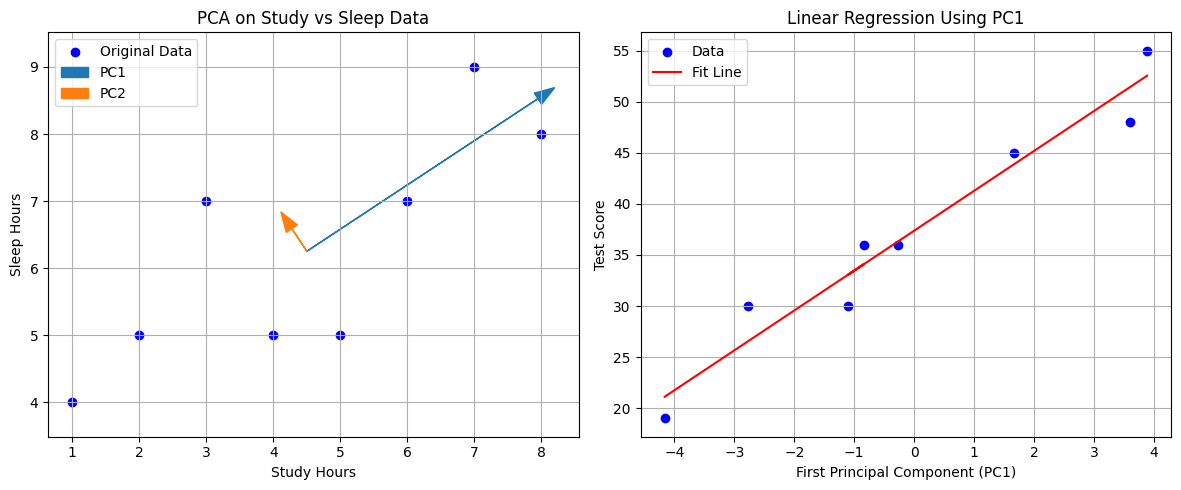

PC1 explains 91.10% of the variance
PC2 explains 8.90% of the variance
Squared Error: 48.67


In [10]:
#@title PCA analysis

X = np.column_stack((x1, x2))

# --- PCA Analysis ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# --- Linear Regression using PC1 ---
PC1 = X_pca[:, 0].reshape(-1, 1)
model = LinearRegression()
model.fit(PC1, y)
y_pred = model.predict(PC1)
squared_error = np.sum((y - y_pred) ** 2)
slope = model.coef_[0]
intercept = model.intercept_

# --- Plotting side by side ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Original data + PCA components
axs[0].scatter(X[:, 0], X[:, 1], color='blue', label='Original Data')
origin = np.mean(X, axis=0)

for i, (length, vector) in enumerate(zip(pca.explained_variance_ / 2, pca.components_)):
    arrow = length * vector
    axs[0].arrow(origin[0], origin[1], arrow[0], arrow[1],
                 head_width=0.2, color=f'C{i}', label=f'PC{i+1}')

axs[0].set_xlabel("Study Hours")
axs[0].set_ylabel("Sleep Hours")
axs[0].set_title("PCA on Study vs Sleep Data")
axs[0].grid(True)
axs[0].axis('equal')
axs[0].legend()

# Plot 2: PC1 vs Test Scores + Regression line
axs[1].scatter(PC1, y, color='blue', label='Data')
axs[1].plot(PC1, y_pred, color='red', label='Fit Line')
axs[1].set_xlabel("First Principal Component (PC1)")
axs[1].set_ylabel("Test Score")
axs[1].set_title("Linear Regression Using PC1")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

# Print explained variance and regression info
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1} explains {var:.2%} of the variance")

print(f"Squared Error: {squared_error:.2f}")

In [18]:
#@title Loading Lung cancer genomics data

#Load proteomics and transcriptomics data for Lung Cancer dataset
proteomics = cptac.Luad().get_proteomics('bcm')
transcriptomics = cptac.Luad().get_transcriptomics('bcm')

# Reduce multi-index structure for both
proteomics = ut.reduce_multiindex(proteomics, levels_to_drop='Database_ID')
transcriptomics = ut.reduce_multiindex(transcriptomics, levels_to_drop='Database_ID')

# Find common columns (genes) between proteomics and transcriptomics
common_columns = proteomics.columns.intersection(transcriptomics.columns)

# Align proteomics and transcriptomics by common columns (genes)
proteomics = proteomics[common_columns]
transcriptomics = transcriptomics[common_columns]

# Remove proteins with NaN values and adjust transcriptomics accordingly
proteomics = proteomics.dropna(axis=1, how='any')
transcriptomics = transcriptomics[proteomics.columns]

# Find common indices (patients) between proteomics and transcriptomics
common_index = proteomics.index.intersection(transcriptomics.index)
proteomics = proteomics.loc[common_index]
transcriptomics = transcriptomics.loc[common_index]

# Compute Q1 and Q3 for transcriptomics
q1_trans = transcriptomics.quantile(0.25)
q3_trans = transcriptomics.quantile(0.75)

# Remove genes with Q1 = 0 (to avoid division issues in CQV)
valid_trans = q1_trans != 0
q1_trans = q1_trans[valid_trans]
q3_trans = q3_trans[valid_trans]

# Compute CQV for transcriptomics
cqv_trans = (q3_trans - q1_trans) / (q3_trans + q1_trans)

# Compute Q1 and Q3 for proteomics
q1_prot = proteomics.quantile(0.25)
q3_prot = proteomics.quantile(0.75)

# Remove genes with Q1 = 0
valid_prot = q1_prot != 0
q1_prot = q1_prot[valid_prot]
q3_prot = q3_prot[valid_prot]

# Compute CQV for proteomics
cqv_prot = (q3_prot - q1_prot) / (q3_prot + q1_prot)

# Drop any NaN or infinite CQV values
cqv_trans = cqv_trans.replace([np.inf, -np.inf], np.nan).dropna()
cqv_prot = cqv_prot.replace([np.inf, -np.inf], np.nan).dropna()

# Find genes that have CQVs in both datasets
common_genes = cqv_trans.index.intersection(cqv_prot.index)

# Combine CQVs (e.g., average or min or max depending on your use case)
combined_cqv = (cqv_trans[common_genes] + cqv_prot[common_genes]) / 2

# Select top 100 genes by combined CQV
top_genes = combined_cqv.sort_values(ascending=False).head(100).index

# Filter proteomics and transcriptomics to top genes
proteomics = proteomics[top_genes]
transcriptomics = transcriptomics[top_genes]

# Print top genes in a readable format
print("\nTop 100 Most Variable Genes:\n")

for i, gene in enumerate(top_genes, 1):
    print(f"{gene:20}", end='\n' if i % 5 == 0 else ' ')



Top 100 Most Variable Genes:

PAEP                 RPS4Y1               PCP4                 FGB                  DDX3Y               
LBP                  IVL                  CRISP3               HBD                  EPB42               
IGHV3-64D            EEF1A2               C8A                  ADH7                 OLFM4               
MUC5AC               PF4                  SERPINB3             IGHV7-4-1            SPINK1              
APOF                 PRPH                 GYPA                 MMP12                SERPINA6            
CXCL13               FBP2                 TCN1                 C9                   SERPINB5            
ITLN1                LPA                  CA4                  BPIFA1               MMP1                
POTEF                HMGCS2               AKR1B10              HGFAC                HABP2               
FBLL1                C1orf87              PGLYRP2              CD5L                 MMP8                
XAGE2                CRA

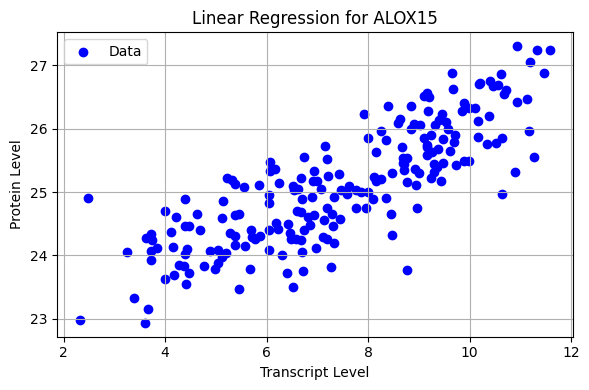

In [12]:
# Task: Perform linear regression to predict proteomics from transcriptomics for one gene

# Choose a gene to analyze
gene = top_genes[-1]  # You can change this!

# Extract transcript and protein values
x = transcriptomics[gene].values  # predictor
y = proteomics[gene].values # target

X = x.reshape(-1, 1)

# Step 1: Compute and print the pearson r value
# r_value = ______
# print(f"Pearson r: {r_value:.2f}")

# Step 2: Create and fit a linear regression model
model = LinearRegression()

# TODO: Fit the model to X and y
# model.______(____, ____)

# Step 3: Predict the proteomics values
# y_pred = model.________(____)

# Step 4: Plot original data and regression line
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label="Data", color='blue')
# plt.plot(x, ____, color='red', label="Fit Line")  # TODO: plot the prediction line
plt.xlabel("Transcript Level")
plt.ylabel("Protein Level")
plt.title(f"Linear Regression for {gene}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Compute and print the squared error
# error = ______
# print(f"Squared Error: {error:.2f}")

In [ ]:
# Task: Predict the same protein level using two or more Transcript levels and compare the results

In [ ]:
# Bonus Task: Do a PCA of the Top 100 most variable Transcript genes and us the first 10 PC's to predict a Protein Level